# 09 Independent Lab
Author: Mark Lannen  
Course: BGEN632 Grad. Introduction to Python  
Term: Spring 2025

## import pandas and os, set working directory and assign 'data' variable to specified data file

In [1]:
# load modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

os.getcwd()
os.chdir('/Users/markl1/Documents/Studies/Grad_School-MBA/Spring_2025/Python/week9labs/data')

# print(df.shape)
# print(df.head())

df = pd.read_csv('ect_data.txt', sep='\t')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   attitude1_01  201 non-null    int64
 1   attitude1_02  201 non-null    int64
 2   attitude1_03  201 non-null    int64
 3   attitude1_04  201 non-null    int64
 4   intent1_01    201 non-null    int64
 5   intent1_02    201 non-null    int64
 6   intent1_03    201 non-null    int64
 7   intent1_04    201 non-null    int64
 8   peruse01      201 non-null    int64
 9   peruse02      201 non-null    int64
 10  peruse03      201 non-null    int64
 11  peruse04      201 non-null    int64
 12  satis01       201 non-null    int64
 13  satis02       201 non-null    int64
 14  satis03       201 non-null    int64
 15  satis04       201 non-null    int64
dtypes: int64(16)
memory usage: 25.3 KB


## Create variables to hold excluded specified columns, non-numerical columns and use those to create a variable for columns that will be used.

In [2]:
excluded_cols = ['intent1_02', 'intent1_03','intent1_04']

numerical_cols = df.select_dtypes(include='number')

cols_to_use = numerical_cols.drop(columns=excluded_cols)
cols_to_use

,attitude1_01,attitude1_02,attitude1_03,attitude1_04,intent1_01,peruse01,peruse02,peruse03,peruse04,satis01,satis02,satis03,satis04
0,6,6,6,6,6,6,4,5,5,5,5,5,5
1,7,7,7,7,7,7,7,7,7,7,6,6,6
2,6,6,6,6,7,6,5,5,5,5,5,5,5
3,7,7,7,7,6,5,5,5,5,7,6,7,6
4,7,7,6,6,7,6,6,7,7,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,6,6,6,7,7,6,5,5,5,6,6,6,5
197,5,6,6,6,7,7,7,6,6,6,4,4,6
198,6,5,6,6,5,6,5,6,5,5,5,6,5
199,6,6,6,6,6,6,6,7,7,5,5,6,5


## Create target and independent variables

In [3]:
target_variable = 'intent1_01'
independent_variables = ['attitude1_04', 'peruse03', 'peruse01', 'satis02', 'satis01']


## Create regression model using sklearn

In [4]:
lin_reg_model = LinearRegression(fit_intercept=True)
lin_reg_model.fit(df[['attitude1_04', 'peruse03', 'peruse01', 'satis02', 'satis01']], df.intent1_01)

LinearRegression()

## Create Model using Statsmodel

In [5]:
model = smf.ols(formula='intent1_01 ~ attitude1_04 + peruse03 + peruse01 + satis02 + satis01', data=cols_to_use)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             intent1_01   R-squared:                       0.481
Model:                            OLS   Adj. R-squared:                  0.467
Method:                 Least Squares   F-statistic:                     36.12
Date:                Sat, 03 May 2025   Prob (F-statistic):           4.40e-26
Time:                        16:03:39   Log-Likelihood:                -222.79
No. Observations:                 201   AIC:                             457.6
Df Residuals:                     195   BIC:                             477.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.5116      0.365      4.138   

## Plot Pearson value

In [6]:
pearsonr(df.intent1_01, df.attitude1_04)

PearsonRResult(statistic=0.5120316317108967, pvalue=7.907993696941627e-15)

## Linearity. For loop to create scatterplot

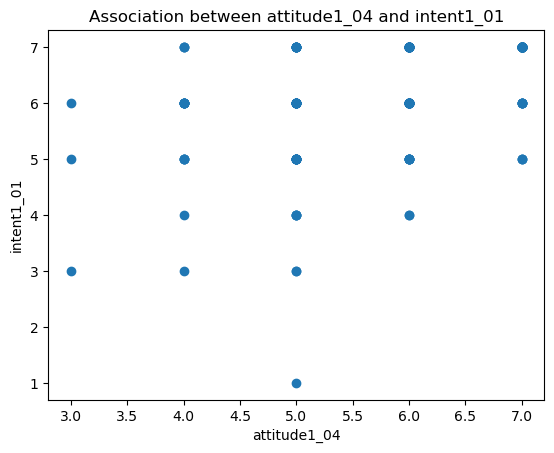

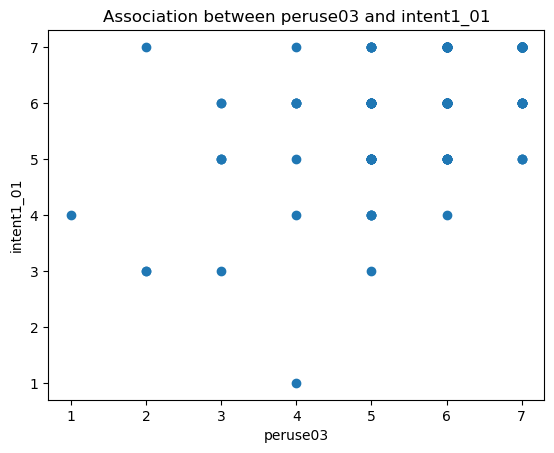

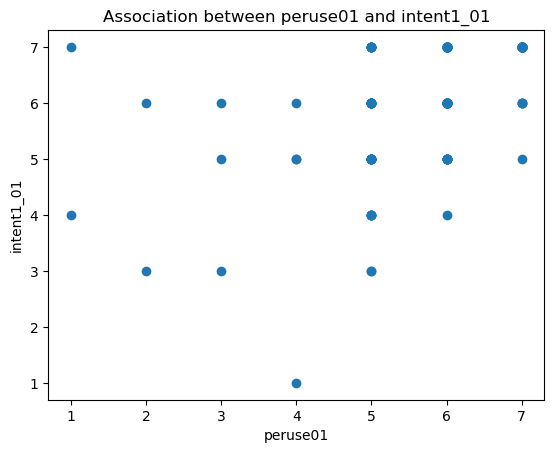

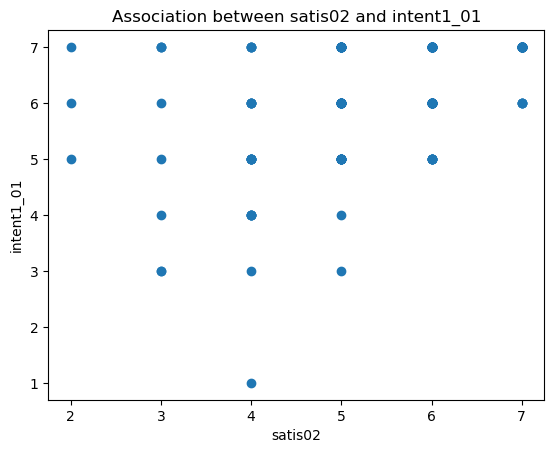

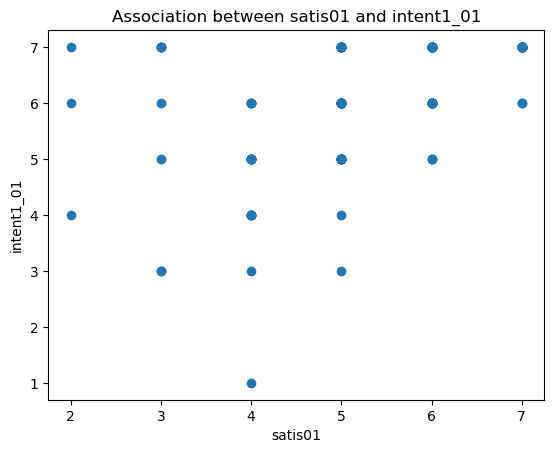

In [7]:
independent_variables = ['attitude1_04', 'peruse03', 'peruse01', 'satis02', 'satis01']

for var in independent_variables:
    plt.figure() # create new figure
    plt.scatter(x=df[var], y=df['intent1_01']) # build the scatterplot
    plt.xlabel(var) # label x axis
    plt.ylabel('intent1_01') # label y axis
    plt.title(f'Association between {var} and intent1_01')
    plt.show
    


## Collinearity

In [8]:
print(pearsonr(df.intent1_01, df.attitude1_04))
print(pearsonr(df.intent1_01, df.peruse03))


PearsonRResult(statistic=0.5120316317108967, pvalue=7.907993696941627e-15)
PearsonRResult(statistic=0.5951034992816807, pvalue=1.2070976842036336e-20)


In [25]:
#Calculate VIF
lin_reg_model.fit(df[['attitude1_04', 'peruse01', 'satis02', 'satis01']], df.peruse03)
vif_1 = 1/(1-lin_reg_model.score(df[['attitude1_04', 'peruse01', 'satis02', 'satis01']], df.peruse03))
print(vif_1)

lin_reg_model.fit(df[['peruse03', 'peruse01', 'satis02', 'satis01']], df.attitude1_04)
vif_2 = 1/(1-lin_reg_model.score(df[['peruse03', 'peruse01', 'satis02', 'satis01']], df.attitude1_04))
print(vif_2)

lin_reg_model.fit(df[['peruse03','attitude1_04', 'satis02', 'satis01']], df.peruse01)
vif_3 = 1/(1-lin_reg_model.score(df[['peruse03','attitude1_04', 'satis02', 'satis01']], df.peruse01))
print(vif_3)

lin_reg_model.fit(df[['peruse03', 'peruse01', 'attitude1_04', 'satis01']], df.satis02)
vif_4 = 1/(1-lin_reg_model.score(df[['peruse03', 'peruse01', 'attitude1_04', 'satis01']], df.satis02))
print(vif_4)

lin_reg_model.fit(df[['peruse03', 'peruse01', 'satis02', 'attitude1_04']], df.satis01)
vif_5 = 1/(1-lin_reg_model.score(df[['peruse03', 'peruse01', 'satis02', 'attitude1_04']], df.satis01))
print(vif_5)

2.781931075027447
1.6425683391184822
2.370321414849106
4.326739807983504
4.488148771744062


## Homoscedasticity

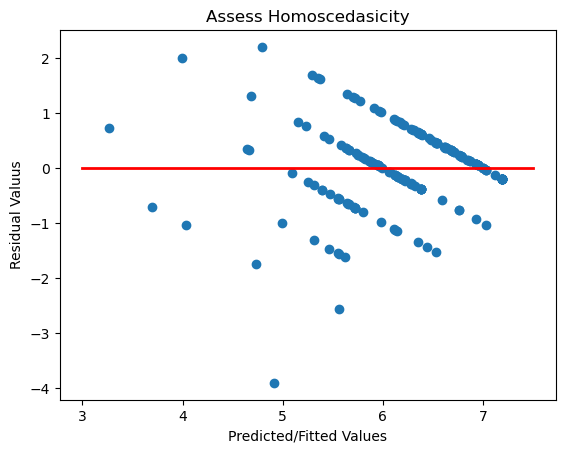

In [36]:
model = smf.ols(formula='intent1_01 ~ attitude1_04 + peruse03 + peruse01 + satis02 + satis01', data=cols_to_use)
fitted_model = model.fit()
plt.scatter(fitted_model.fittedvalues, fitted_model.resid)
plt.xlabel('Predicted/Fitted Values')
plt.ylabel('Residual Valuus')
plt.title('Assess Homoscedasicity')
plt.plot([3,7.5],[0,0], 'red', lw=2)
plt.show()

In [40]:
lin_reg_model.summary()

AttributeError: 'LinearRegression' object has no attribute 'summary'